In [1]:
from IPython.display import display, HTML

def show_title(text):
    display(HTML(f'''
    <div style="
        font-size: 25px;
        width: 50%;
        color: #2C3E50;  /* رنگ متن تیره مناسب پس‌زمینه سفید */
        text-shadow: 1px 1px 2px rgba(0,0,0,0.1);  /* سایه ملایم */
        text-align: left;
        border-bottom: 2px solid #2980B9;  /* خط آبی زیبا زیر متن */
        margin-top: 20px;
        margin-bottom: 10px;
        font-weight: bold;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    ">
        {text}
    </div>
    '''))




<p style="background-color:#FFaaff;
          font-family:sans-serif;
          color:#FF00FF;
          font-size:250%;
          text-align:left;
          border-radius:15px 15px;">
Import Modules
</p>



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [3]:
show_title('Load Dataset')

In [4]:
data = pd.read_csv('/kaggle/input/students-score-dataset-linear-regression/student_scores.csv')


In [5]:
df = pd.DataFrame(data)

In [6]:
df.shape

(25, 2)

In [7]:

show_title('Top 5 Sample')


In [8]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
show_title('Insert Data in DataFrame df')

In [10]:
df = pd.DataFrame(data)

In [11]:
show_title('Describe Dataset')

In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
show_title('Check The datatype')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [15]:
show_title("🧹 Data Cleaning")

In [16]:
show_title("Checking Data duplicated")

In [17]:
df.duplicated().sum()

0

In [18]:
show_title("Checking Data isnull")

In [19]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [20]:
show_title("Delete Data dropna")

In [21]:
df.dropna(inplace=True)

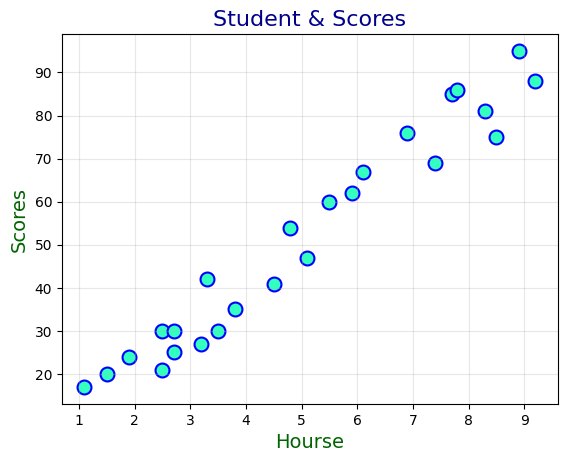

In [22]:
sns.scatterplot(x=df['Hours'], y=df['Scores'], s=100,color='#33ffbe',edgecolor='blue',        # رنگ دور دایره
    linewidth=1.5)
plt.title('Student & Scores',fontsize=16, color='darkblue')
plt.xlabel('Hourse', fontsize=14, color='darkgreen')
plt.ylabel('Scores', fontsize=14, color='darkgreen')
plt.grid(True, alpha=0.3)
plt.xticks()
plt.show()



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
X =df['Hours'].values.reshape(-1,1)
Y = df['Scores'].values.reshape(-1,1)

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [26]:
regresore = LinearRegression()

In [27]:
regresore.fit(X_train , Y_train)

LinearRegression()

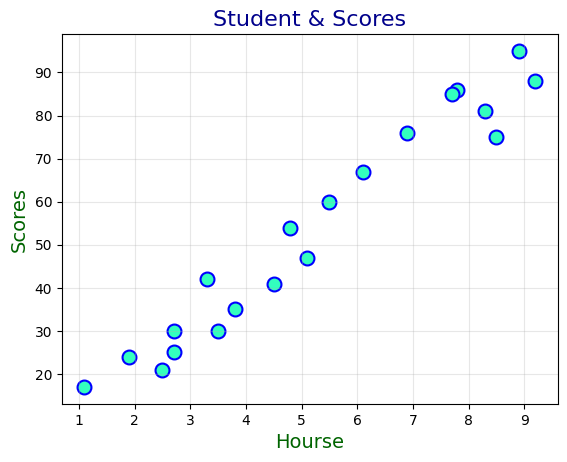

In [28]:

sns.scatterplot(x=X_train.ravel(), y=Y_train.ravel(), s=100,color='#33ffbe',edgecolor='blue',        # رنگ دور دایره
    linewidth=1.5)
plt.title('Student & Scores',fontsize=16, color='darkblue')
plt.xlabel('Hourse', fontsize=14, color='darkgreen')
plt.ylabel('Scores', fontsize=14, color='darkgreen')
plt.grid(True, alpha=0.3)
plt.xticks()
plt.show()

In [29]:
Y_pred = regresore.predict(X_test)

In [30]:
#intercept
print(regresore.intercept_)
#slop
print(regresore.coef_)

[2.01816004]
[[9.91065648]]


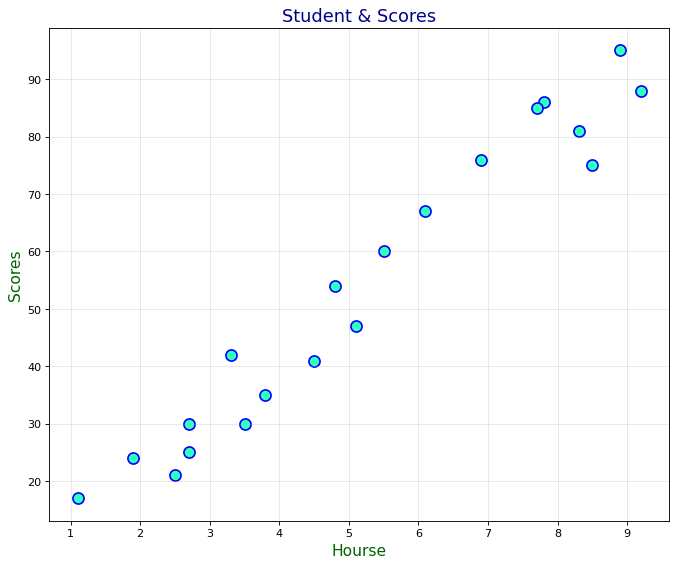

In [31]:
plt.figure(figsize=(10,8),dpi=80)

sns.scatterplot(x=X_train.ravel(), y=Y_train.ravel(), s=100,color='#33ffbe',edgecolor='blue',        # رنگ دور دایره
    linewidth=1.5)
plt.title('Student & Scores',fontsize=16, color='darkblue')
plt.xlabel('Hourse', fontsize=14, color='darkgreen')
plt.ylabel('Scores', fontsize=14, color='darkgreen')
plt.grid(True, alpha=0.3)
plt.xticks()
plt.show()

In [32]:
import sklearn
print(sklearn.__version__)


1.2.2


In [33]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R² Score:', metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error (MAE): 4.183859899002982
Mean Squared Error (MSE): 21.598769307217456
Root Mean Squared Error (RMSE): 4.647447612100373
R² Score: 0.9454906892105354


In [34]:
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred.shape)


X_test shape: (5, 1)
Y_test shape: (5, 1)
Y_pred shape: (5, 1)


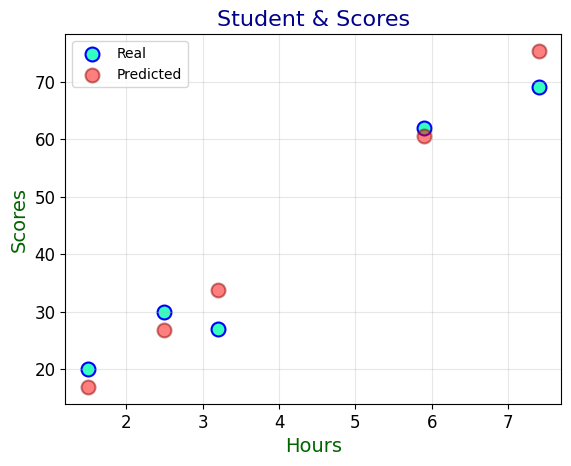

In [35]:
sns.scatterplot(
    x=X_test.ravel(), 
    y=Y_test.ravel(), 
    s=100,
    color='#33ffbe',
    edgecolor='blue',
    linewidth=1.5,
    label='Real'
)


sns.scatterplot(
    x=X_test.ravel(), 
    y=Y_pred.ravel(), 
    s=100,
    color='red',
    alpha=0.5,
    edgecolor='darkred',
    linewidth=1.5,
    label='Predicted'
)

plt.title('Student & Scores', fontsize=16, color='darkblue')
plt.xlabel('Hours', fontsize=14, color='darkgreen')
plt.ylabel('Scores', fontsize=14, color='darkgreen')
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()


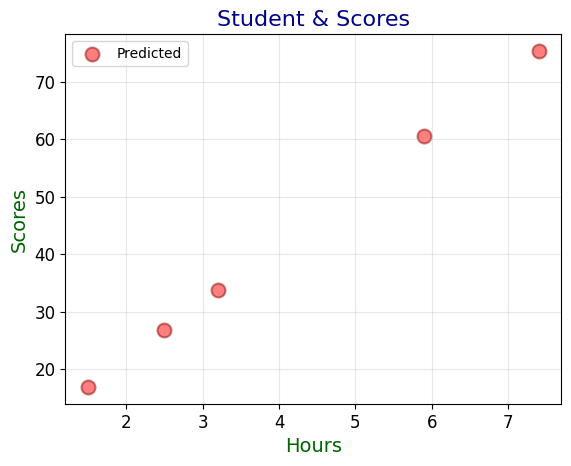

In [36]:
sns.scatterplot(
    x=X_test.ravel(), 
    y=Y_pred.ravel(), 
    s=100,
    color='red',
    alpha=0.5,
    edgecolor='darkred',
    linewidth=1.5,
    label='Predicted'
)

plt.title('Student & Scores', fontsize=16, color='darkblue')
plt.xlabel('Hours', fontsize=14, color='darkgreen')
plt.ylabel('Scores', fontsize=14, color='darkgreen')
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

In [37]:
compare = pd.DataFrame({'Actual':Y_test.flatten(),'predicted':Y_pred.flatten()})
compare

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


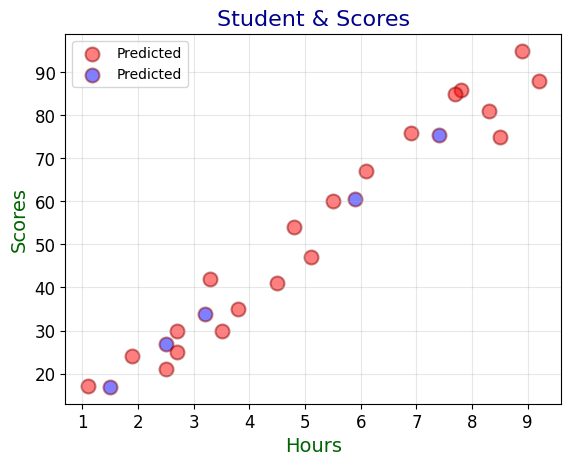

In [38]:
a=X_train
b=Y_train
c=X_test
d=Y_pred
sns.scatterplot(
    x=a.ravel(), 
    y=b.ravel(), 
    s=100,
    color='red',
    alpha=0.5,
    edgecolor='darkred',
    linewidth=1.5,
    label='Predicted'
)
sns.scatterplot(
    x=c.ravel(), 
    y=d.ravel(), 
    s=100,
    color='blue',
    alpha=0.5,
    edgecolor='darkred',
    linewidth=1.5,
    label='Predicted'
)
plt.title('Student & Scores', fontsize=16, color='darkblue')
plt.xlabel('Hours', fontsize=14, color='darkgreen')
plt.ylabel('Scores', fontsize=14, color='darkgreen')
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

In [39]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [40]:
df2 = pd.DataFrame({"Hours":[3.5,5,7,9,6,5],"Scores":[0,0,0,0,0,0]})


In [41]:
df2

,Hours,Scores
0,3.5,0
1,5.0,0
2,7.0,0
3,9.0,0
4,6.0,0
5,5.0,0


In [42]:
df3 = pd.concat([df,df2])

In [43]:
df3.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


> **Data Splitting: Train and Test Sets**

In [44]:
train = df3.iloc[:25]
test = df3.iloc[25:]

In [45]:
train

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [46]:
test

,Hours,Scores
0,3.5,0
1,5.0,0
2,7.0,0
3,9.0,0
4,6.0,0
5,5.0,0


> **Feature and Label Extraction for Training**

In [47]:
X_train =df3["Hours"][:25].values.reshape(-1,1)
Y_train =df3['Scores'][:25].values.reshape(-1,1)

In [48]:
X_test = df3["Hours"][25:].values.reshape(-1,1)

**Fitting the Model to Training Data**

In [49]:
regresore.fit(X_train,Y_train)

LinearRegression()

**Predicting Test Data Outcomes**

In [50]:
Y_pred = regresore.predict(X_test)

In [51]:
Y_pred

array([[36.69898527],
       [51.36269036],
       [70.91429714],
       [90.46590392],
       [61.13849375],
       [51.36269036]])

**Scatter Plot of Predicted Scores vs. Hours Studied**

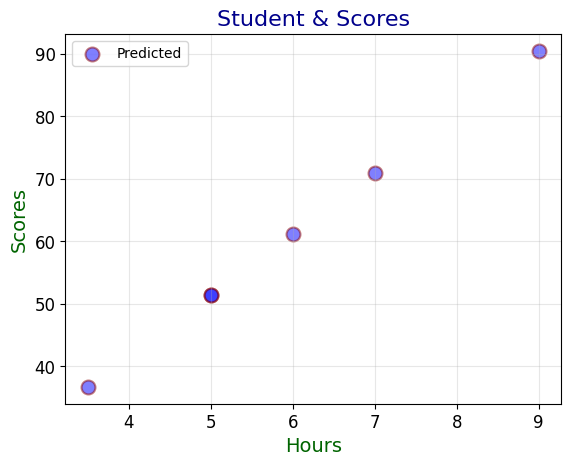

In [52]:
sns.scatterplot(
    x=X_test.ravel(), 
    y=Y_pred.ravel(), 
    s=100,
    color='blue',
    alpha=0.5,
    edgecolor='darkred',
    linewidth=1.5,
    label='Predicted'
)
plt.title('Student & Scores', fontsize=16, color='darkblue')
plt.xlabel('Hours', fontsize=14, color='darkgreen')
plt.ylabel('Scores', fontsize=14, color='darkgreen')
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

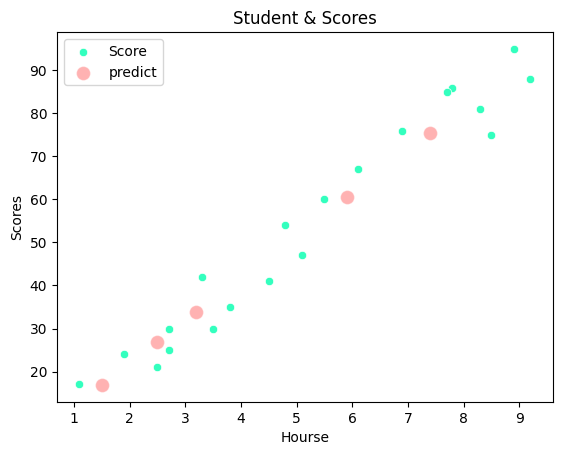

In [53]:
sns.scatterplot(
    x=a.ravel(),
    y=b.ravel(),
    color='#33ffbe',
    label='Score'
)

sns.scatterplot(
    x=c.ravel(),
    y=d.ravel(),
    color='red',
    s=100,
    alpha=0.3,
    label='predict'
)


plt.xlabel('Hourse')
plt.ylabel('Scores')
plt.title('Student & Scores')
plt.legend()
plt.show()


In [54]:
df3 = pd.DataFrame({
    'X_test': X_test.ravel(),
    'Y_pred': Y_pred.ravel()
})

print(df3)

   X_test     Y_pred
0     3.5  36.698985
1     5.0  51.362690
2     7.0  70.914297
3     9.0  90.465904
4     6.0  61.138494
5     5.0  51.362690
